In [84]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model

import keras.backend as K
from keras.models import Sequential

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

In [85]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [86]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [87]:
def prepareImages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img("./"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X_train

In [88]:
 def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    # print(onehot_encoded)

    y = onehot_encoded
    # print(y.shape)
    return y, label_encoder

In [89]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [90]:
X = prepareImages(train_df, train_df.shape[0], "train")
X /= 255

Preparing images
Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg

In [91]:
y, label_encoder = prepare_labels(train_df['Id'])

/Users/ayomidealabi/miniforge3/envs/data-science/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
y.shape

(25361, 5005)

In [99]:
from keras.optimizers import adam

model = Sequential()

model.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool'))
model.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3), name='avg_pool'))

model.add(Flatten())
model.add(Dense(500, activation="relu", name='rl'))
model.add(Dropout(0.8))

model.add(Dense(y.shape[1], activation='softmax', name='sm'))

model.compile(optimizer,loss='categorical_crossentropy', metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv0 (Conv2D)              (None, 94, 94, 32)        4736      
                                                                 
 bn0 (BatchNormalization)    (None, 94, 94, 32)        128       
                                                                 
 activation_22 (Activation)  (None, 94, 94, 32)        0         
                                                                 
 max_pool (MaxPooling2D)     (None, 47, 47, 32)        0         
                                                                 
 conv1 (Conv2D)              (None, 45, 45, 64)        18496     
                                                                 
 activation_23 (Activation)  (None, 45, 45, 64)        0         
                                                                 
 avg_pool (AveragePooling2D)  (None, 15, 15, 64)      

In [101]:
import gc
history = model.fit(X, y, epochs=10, batch_size=128, verbose=1)
gc.collect()

Epoch 1/10
199/199 [==============================] - 35s 170ms/step - loss: 8.2289 - accuracy: 0.3811
Epoch 2/10
199/199 [==============================] - 34s 169ms/step - loss: 7.9232 - accuracy: 0.3811
Epoch 3/10
199/199 [==============================] - 34s 169ms/step - loss: 7.7474 - accuracy: 0.3811
Epoch 4/10
199/199 [==============================] - 34s 169ms/step - loss: 7.6026 - accuracy: 0.3811
Epoch 5/10
199/199 [==============================] - 34s 169ms/step - loss: 7.4745 - accuracy: 0.3811
Epoch 6/10
199/199 [==============================] - 34s 169ms/step - loss: 7.3571 - accuracy: 0.3811
Epoch 7/10
199/199 [==============================] - 34s 169ms/step - loss: 7.2471 - accuracy: 0.3811
Epoch 8/10
199/199 [==============================] - 34s 170ms/step - loss: 7.1427 - accuracy: 0.3811
Epoch 9/10
199/199 [==============================] - 34s 169ms/step - loss: 7.0428 - accuracy: 0.3811
Epoch 10/10
199/199 [==============================] - 34s 170ms/step - l

2635

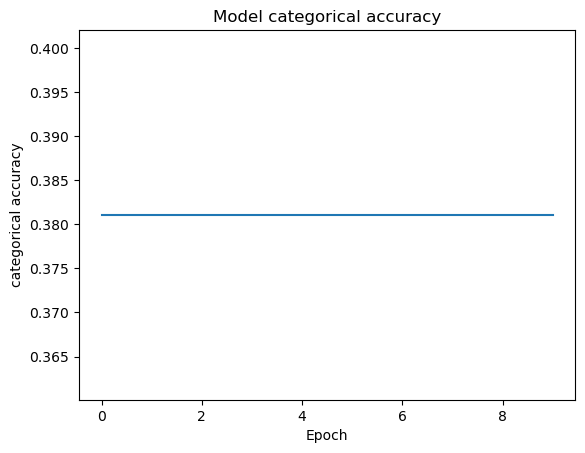

In [103]:
plt.plot(history.history['accuracy'])
plt.title('Model categorical accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('Epoch')
plt.show()


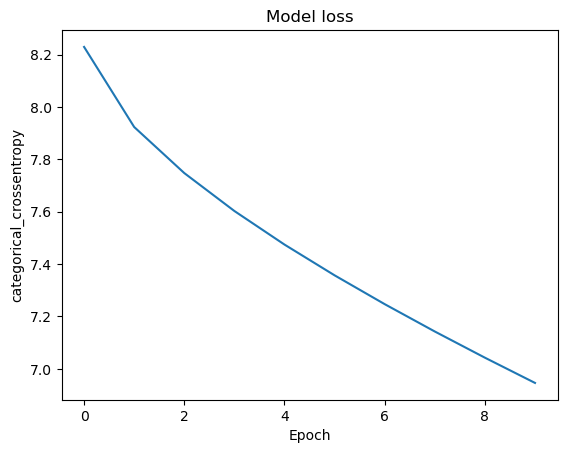

In [105]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('categorical_crossentropy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
test = os.listdir("./test/")
print(len(test))

In [ ]:
col = ['Image']
test_df = pd.DataFrame(test, columns=col)
test_df['Id'] = ''

In [ ]:
X = prepareImages(test_df, test_df.shape[0], "test")
X /= 255

In [ ]:
predictions = model.predict(np.array(X), verbose=1)

In [ ]:
for i, pred in enumerate(predictions):
    test_df.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

In [ ]:
test_df.head(10)
test_df.to_csv('submission.csv', index=False)